<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/fastai/01_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.fast.ai/tutorial.vision.html

In [1]:
from fastai.vision.all import *

## Cat vs Dog

In [2]:
path = Path('/content/PETS')
path = untar_data(URLs.PETS,data=path)

In [3]:
path.ls()

(#2) [Path('/content/PETS/oxford-iiit-pet/images'),Path('/content/PETS/oxford-iiit-pet/annotations')]

In [4]:
files = get_image_files(path/"images")
len(files)

7390

In [5]:
files[0],files[9]

(Path('/content/PETS/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),
 Path('/content/PETS/oxford-iiit-pet/images/Bombay_48.jpg'))

In [6]:
def label_func(f): return f[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

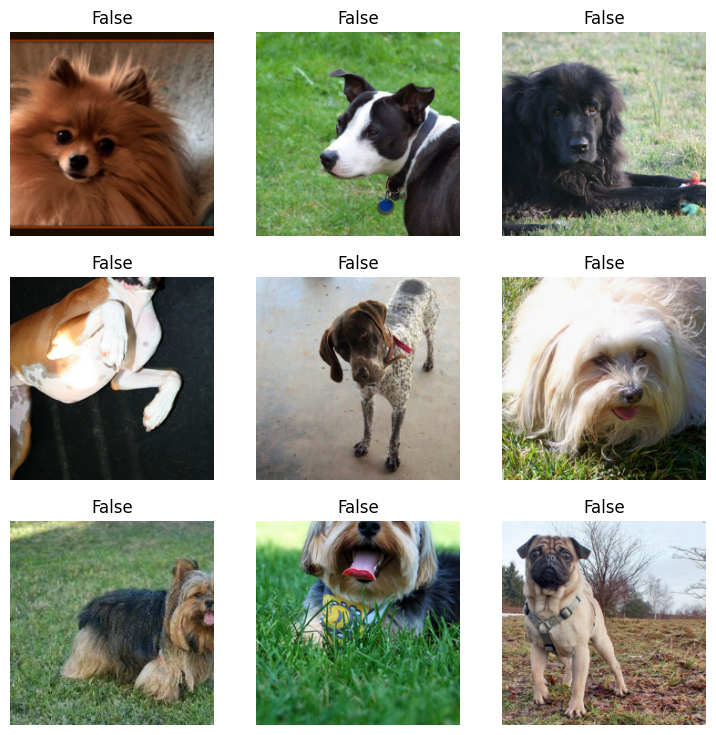

In [8]:
dls.show_batch()

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/content/PETS/oxford-iiit-pet/images/newfoundland_103.jpg


Cat? False


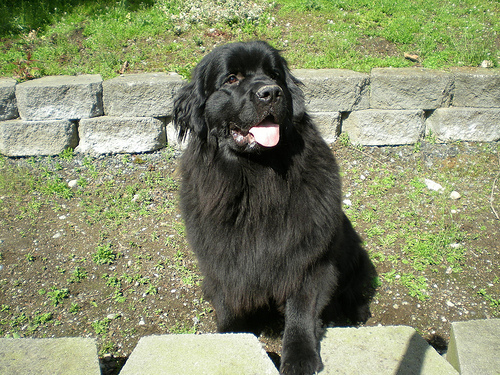

In [20]:
n=1984
print(files[n])
im = PILImage.create(files[n])
ans = learn.predict(files[n])
print(f'Cat? {ans[0]}')
im

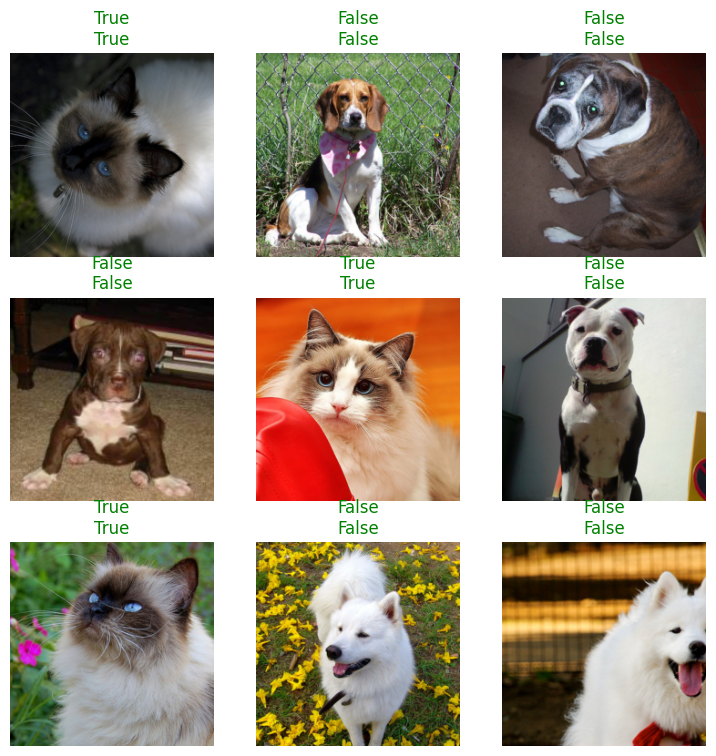

In [11]:
learn.show_results()

## Classifying bleeds

In [21]:
files[0].name

'staffordshire_bull_terrier_76.jpg'

In [24]:
pat = r'^(.*)_\d+.jpg'

'^(.*)_\\d+.jpg'

In [25]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

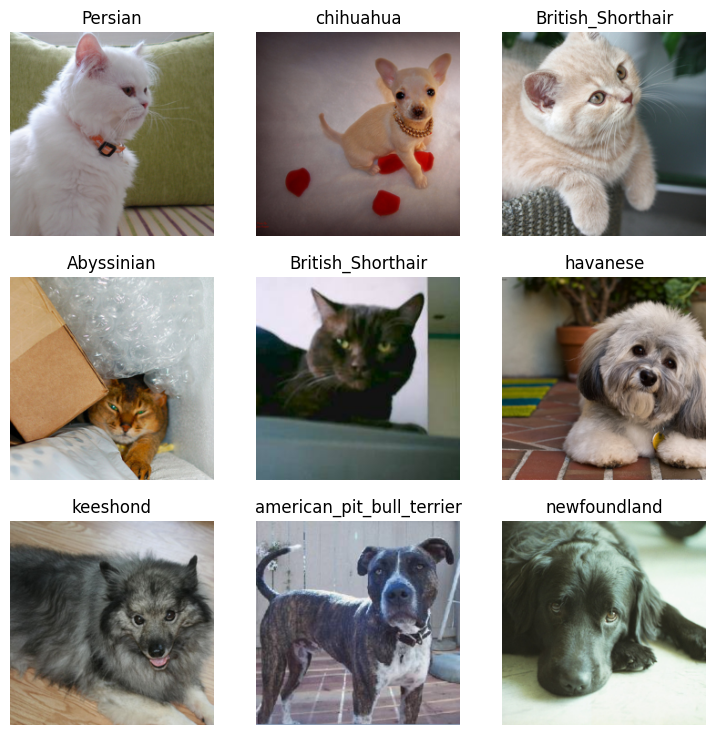

In [26]:
dls.show_batch()

In [27]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

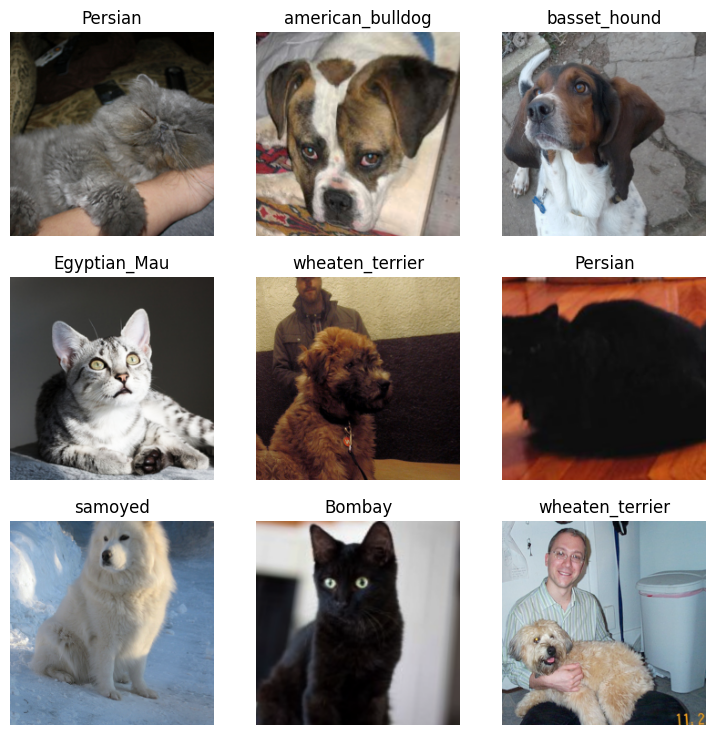

In [28]:
dls.show_batch()

In [29]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0003311311302240938)

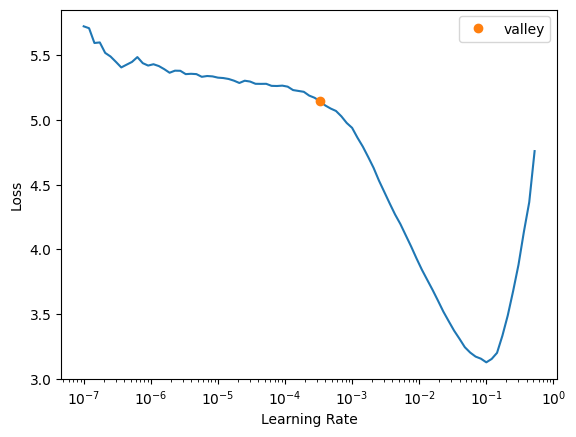

In [30]:
learn.lr_find()

In [31]:
learn.fine_tune(2, 3e-3)

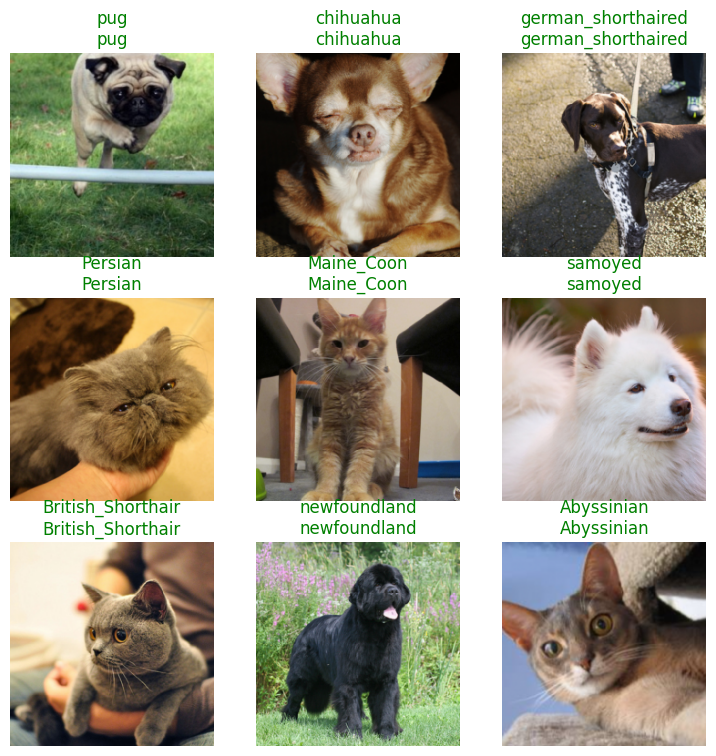

In [32]:
learn.show_results()

In [33]:
interp = Interpretation.from_learner(learn)

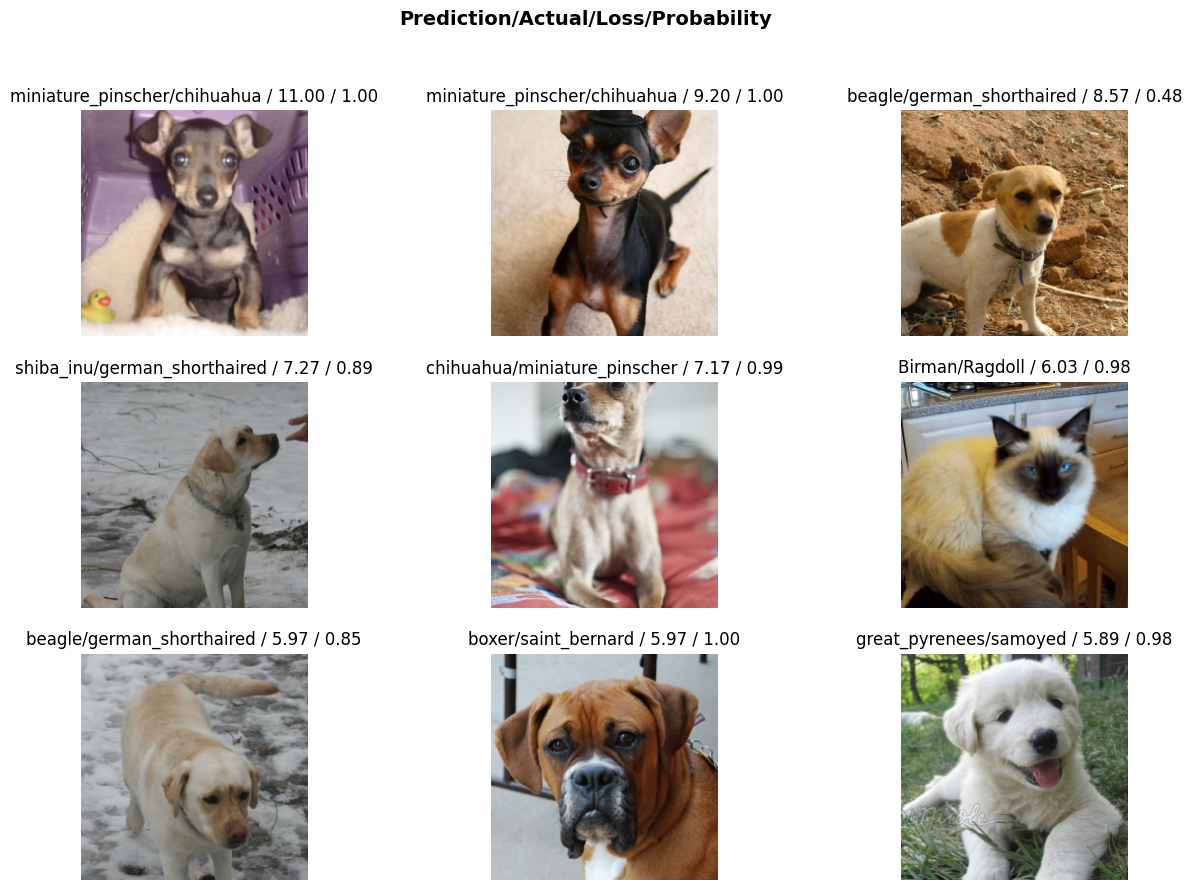

In [34]:
interp.plot_top_losses(9, figsize=(15,10))

/content/PETS/oxford-iiit-pet/images/Bombay_19.jpg


Bleed? Bombay


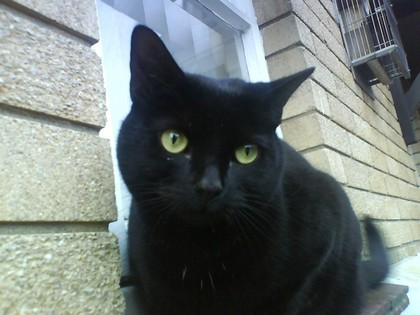

In [35]:
n=442
print(files[n])
im = PILImage.create(files[n])
ans = learn.predict(files[n])
print(f'Bleed? {ans[0]}')
im